#iPython Cookbook - Monte Carlo Pricing I - Call (Normal model)
>Pricing a call option with Monte Carlo (Normal model)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Those are our option and market parameters: the exercise price of the option `strike`, the forward price of the underlying security `forward` and its volatility `vol` (note that we are using a Gaussian model here, not a lognormal one, so the volatility number is in units of currency, not in percent)

In [2]:
strike   = 100
forward  = 110
vol      = 50


We now define our payoff function using a closure: the variable payoff represents a function with one parameter `spot` with the strike `k` being frozen at whatever value it had when the outer function `call` was called to set `payoff`

In [3]:
def call(k=100):
    def payoff(spot):
        if spot > k:
            return spot - k
        else:
            return 0
    return payoff

payoff = call(k=strike)
#payoff(110)

We now generate a set of Standard Gaussian variables $z$ as a basis for our simulation...

In [4]:
N = 10000
z = np.random.standard_normal((N))
#z

...and transform it in a Gaussian variable with the right mean and standard deviation, ie a variable that is distributed according to $N(forward,vol)$

In [5]:
x = forward + vol * z
#x

We first look at the histogram of the spot prices $x$

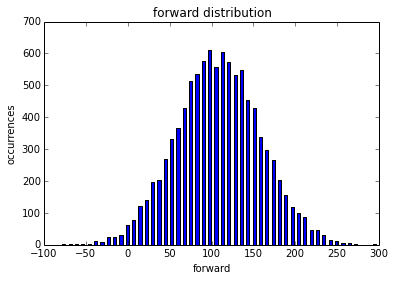

In [6]:
hg0=np.histogram(x, bins=50)
xvals0 = np.delete(hg0[1], -1)
plt.bar(xvals0,hg0[0], width=0.5*(xvals0[1]-xvals0[0]))
plt.title('forward distribution')
plt.xlabel('forward')
plt.ylabel('occurrences')
plt.show()

We now determine the payoff values from our draws of the final spot price. Note that we need to use the `map` command rather than simply writing `po = payoff(x)`. The reason for this is that this latter form is not compatible with the `if` statement in our payoff function. We also already compute the forward value of the option, which is simply the average payoff over all simulations.

In [7]:
po = list(map(payoff,x))
fv = mean(po)
#po

Now we produce the histogram of the payoffs

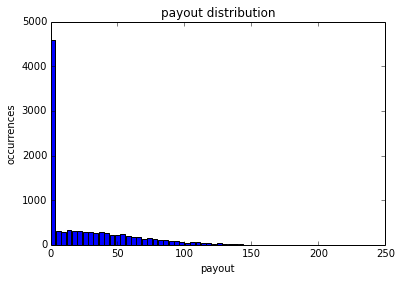

In [8]:
hg = np.histogram(po,bins=50)
xvals = np.delete(hg[1], -1)
plt.bar(xvals,hg[0], width=0.9*(xvals[1]-xvals[0]))
plt.title('payout distribution')
plt.xlabel('payout')
plt.ylabel('occurrences')
plt.show()

In the next step we compute our "Greeks", ie a number of derivatives of the forward value with respect to the underlying parameters. What is crucial here is that those derivative are calculated *on the same draw random numbers* $z$, otherwise the Monte Carlo sampling error will dwarf the signal. The sensitivities we compute are to increase / decrease the forward by one currency unit (for *Delta* and *Gamma*) and to increase the volatility by one currency unit (for *Vega*)

In [9]:
x = forward + 1 + vol * z
po = list(map(payoff,x))
fv_plus = mean(po)

x = forward - 1 + vol * z
po = list(map(payoff,x))
fv_minus = mean(po)

x = forward + (vol + 1) * z
po = list(map(payoff,x))
fv_volp = mean(po)


In [10]:
print ("Forward     =  %f" % forward)
print ("Strike      =  %f" % strike)
print ("Volatility  =  %f" % vol)
print ("PV          =  %f" % fv)
print ("Delta       =  %f" % ((fv_plus - fv_minus)/2))
print ("Gamma       =  %f" % ((fv_plus + fv_minus - 2 * fv)))
print ("Vega        =  %f" % ((fv_volp - fv)))

Forward     =  110.000000
Strike      =  100.000000
Volatility  =  50.000000
PV          =  25.235499
Delta       =  0.573365
Gamma       =  0.008789
Vega        =  0.390177


## Licence and version
*(c) Stefan Loesch / oditorium 2014; all rights reserved 
([license](https://github.com/oditorium/blog/blob/master/LICENSE))*

In [11]:
import sys
print(sys.version)

3.4.0 (default, Apr 11 2014, 13:05:11) 
[GCC 4.8.2]
